In [79]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import linregress

In [80]:
#file to load

city="cities.csv"

#read file and store into Pandas
city_data=pd.read_csv(city)
city_data.head()
print(len(city_data))

635


In [173]:
city_data.head(50)

,City,lat,temp,sunrise,sunset,solar_rad,day_length
0,oiso,35.31558,18.3,2020-10-27 20:59:00,2020-10-27 07:52:00,411.5,653.0
1,mahebourg,-20.40806,21.1,2020-10-27 01:30:00,2020-10-27 14:16:00,66.6,766.0
2,khormuj,28.65430,6.0,2020-10-27 02:39:00,2020-10-27 13:47:00,0.0,668.0
3,palmer,10.74055,28.0,2020-10-27 10:49:00,2020-10-27 22:36:00,0.0,707.0
4,pokhara,28.26689,23.9,2020-10-27 00:25:00,2020-10-27 11:42:00,259.5,677.0
5,areka,7.06667,23.6,2020-10-27 02:56:00,2020-10-27 14:57:00,0.0,721.0
6,zilair,52.23320,-2.2,2020-10-27 02:54:00,2020-10-27 12:42:00,0.0,588.0
7,sungairaya,-2.85660,31.3,2020-10-27 21:57:00,2020-10-27 10:11:00,873.0,734.0
8,georgetown,12.05644,25.0,2020-10-27 09:58:00,2020-10-27 21:43:00,0.0,705.0
9,awbari,26.59206,18.5,2020-10-27 05:29:00,2020-10-27 16:40:00,0.0,671.0


In [172]:
city_data_clean=city_data[(city_data['solar_rad']>0.0)]

city_data_clean=city_data_clean.reset_index()

city_data_clean
# city_data=city_data[(city_data['lat']>54.5260) & (city_data['lat']<105.255)]
# city_data


# #4.5260° N, 105.2551° W

,index,City,lat,temp,sunrise,sunset,solar_rad,day_length
0,0,oiso,35.31558,18.3,2020-10-27 20:59:00,2020-10-27 07:52:00,411.5,653.0
1,1,mahebourg,-20.40806,21.1,2020-10-27 01:30:00,2020-10-27 14:16:00,66.6,766.0
2,4,pokhara,28.26689,23.9,2020-10-27 00:25:00,2020-10-27 11:42:00,259.5,677.0
3,7,sungairaya,-2.85660,31.3,2020-10-27 21:57:00,2020-10-27 10:11:00,873.0,734.0
4,17,bambous virieux,-20.34278,21.1,2020-10-27 01:30:00,2020-10-27 14:16:00,66.6,766.0
...,...,...,...,...,...,...,...,...
229,618,koumac,-20.56667,29.2,2020-10-27 18:13:00,2020-10-27 07:04:00,1030.0,771.0
230,622,zhigansk,66.76601,-9.1,2020-10-27 22:41:00,2020-10-27 07:30:00,19.2,529.0
231,623,okhotsk,59.36200,-0.5,2020-10-27 21:08:00,2020-10-27 06:15:00,235.6,547.0
232,627,deputatskiy,69.30958,-9.1,2020-10-27 22:41:00,2020-10-27 07:30:00,16.5,529.0


In [83]:
city_data_clean=city_data_clean[(city_data_clean['lat']>45) & (city_data_clean['lat']<90)]
city_data_clean=city_data_clean.reset_index()
city_data_clean

,level_0,index,City,lat,temp,sunrise,sunset,solar_rad,day_length
0,6,32,provideniya,64.42289,0.4,2020-10-27 18:54:00,2020-10-27 03:29:00,31.4,515.0
1,9,40,beringovskiy,63.06101,-4.1,2020-10-27 19:41:00,2020-10-27 04:06:00,22.7,505.0
2,10,42,turukhansk,65.79479,-19.6,2020-10-27 02:11:00,2020-10-27 09:36:00,3.2,445.0
3,24,80,tiksi,71.69002,-9.1,2020-10-27 22:41:00,2020-10-27 07:30:00,8.4,529.0
4,26,87,ayagoz,47.96447,9.8,2020-10-27 01:21:00,2020-10-27 11:24:00,66.0,603.0
5,40,115,khatanga,71.98002,-17.2,2020-10-27 00:14:00,2020-10-27 08:18:00,0.3,484.0
6,41,116,cherskiy,68.75325,-0.5,2020-10-27 21:08:00,2020-10-27 06:15:00,81.2,547.0
7,44,127,pevek,69.70287,-4.1,2020-10-27 19:41:00,2020-10-27 04:06:00,11.1,505.0
8,46,129,saskylakh,71.96347,-17.2,2020-10-27 00:14:00,2020-10-27 08:18:00,2.1,484.0
9,52,156,novobiryusinskiy,56.95780,-1.0,2020-10-27 00:12:00,2020-10-27 09:42:00,38.4,570.0


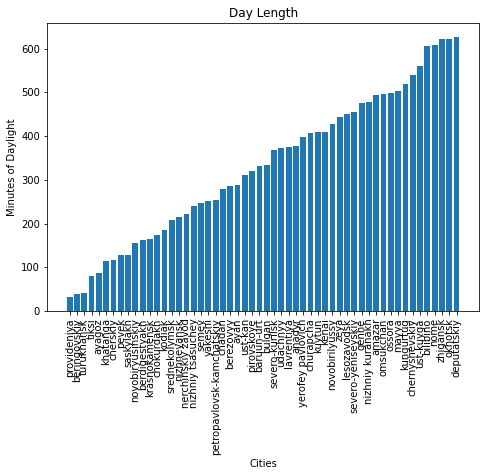

In [139]:


# plt.figure(figsize=(40, 8))


fig = plt.figure()

#plt.figsize=(40, 8)

#ax = plt.subplots(figsize=(20, 10))
#figure(num=None, figsize=(40, 10), dpi=80, facecolor='w', edgecolor='k')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
city = city_data_clean["index"]
daylight = city_data_clean["City"]
ax.bar(daylight, city)
plt.xticks(rotation='vertical')
plt.xlabel("Cities")
plt.ylabel("Minutes of Daylight")
plt.title('Day Length')
plt.show()





# city_data_day_length=city_data_clean["day_length"]
# city_data_day_length.plot.bar()




In [ ]:
#this is for the boxplot. Will need further updating
fig1, ax1 = plt.subplots()
ax1.set_title('Solar Radiation')
ax1.set_ylabel('Day Length')
ax1.boxplot(tumor_volume, labels=treatments)
plt.show()

Text(0.5, 1.0, 'Amount of Solar Radiation')

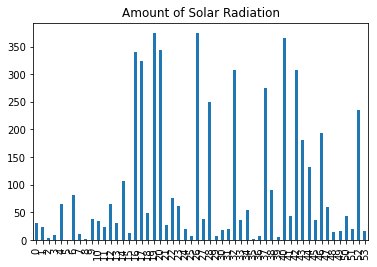

In [166]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# city = city_data_clean["index"]
# radiation = city_data_clean["solar_rad"]
# ax.bar(radiation, city)
# plt.xticks(rotation='vertical')
# plt.xlabel("Cities")
# plt.ylabel("Amount of Radiation")
# plt.title('Solar Radiation')
# plt.show()


city_data_solar_rad=city_data_clean["solar_rad"]
city_data_solar_rad.plot.bar()
plt.title('Amount of Solar Radiation')

In [ ]:
x_values = city_data_solar_rad #weight, average will come from scatterplot and using .mean()
y_values = city_data_latitude #tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.bar(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Radiation')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

Text(0.5, 1.0, 'Day Length versus Solar Radiation at 0-45 degrees')

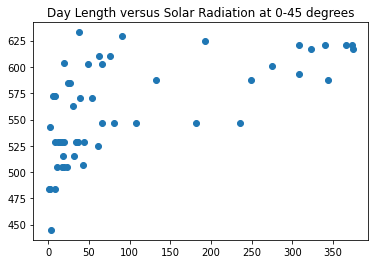

In [154]:
# mouse_weight=final_volume_regimen_capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()
# tumorvolume=final_volume_regimen_capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

#mouse_weight

city_data_day_length=city_data_clean["day_length"]
city_data_solar_rad=city_data_clean["solar_rad"]
city_data_latitude=city_data_clean["lat"]

plt.scatter(x=city_data_solar_rad, y=city_data_day_length)
plt.title('Day Length versus Solar Radiation at 0-45 degrees')

Text(0.5, 1.0, 'Day Length versus Latitude at 0-45 degrees')

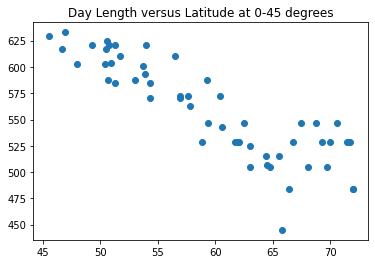

In [161]:
city_data_latitude=city_data_clean["lat"]

plt.scatter(x=city_data_latitude, y=city_data_day_length)
plt.title('Day Length versus Latitude at 0-45 degrees')

Text(0.5, 1.0, 'Radiation versus Latitude at 0-45 degrees')

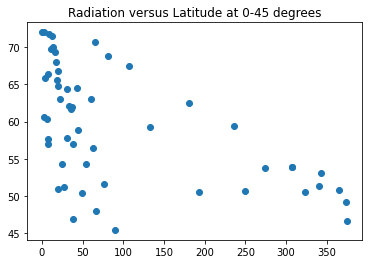

In [168]:
plt.scatter(x=city_data_solar_rad, y=city_data_latitude)
plt.title("Radiation versus Latitude at 0-45 degrees")

The r-squared is: 0.30976754229733294


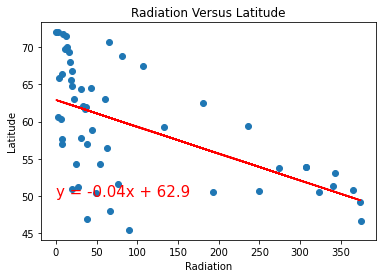

In [170]:
x_values = city_data_solar_rad #city_data_solar refers to <city_data_solar_rad_df=city_data_clean["solar_rad"]>
y_values = city_data_latitude 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Radiation')
plt.ylabel('Latitude')
plt.title("Radiation Versus Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()